# Face Recognition Model

In [3]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.optimizers import Adam

import random
from keras.utils import Sequence
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
from PIL import Image

sys.modules['Image'] = Image
print(Image.__file__)
from sklearn.preprocessing import LabelEncoder

import cv2
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization,AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

ImportError: DLL load failed: The specified procedure could not be found.

In [2]:
%matplotlib inline

## Image Data Preprocessing 

Retrieving image dataset using ImageDataGenerator from local dir and spliting training and validation data 

In [3]:
data_dir= "Dataset/"
classes=["Jinwei", "Lwando"]

In [10]:
datagen = ImageDataGenerator(validation_split=0.3, rescale =1./255)


train_data_gen = datagen.flow_from_directory(
    data_dir, target_size=(250,250),
    #class_mode='sparse',
    classes = classes,
    subset='training',
    shuffle = True,
)

val_data_gen = datagen.flow_from_directory(
    data_dir,target_size=(250,250),
    #class_mode='sparse',
    classes = classes,
    subset='validation',
    shuffle = True,
)

train_data_gen

Found 112 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


### Displaying Leaf Images

Keras functions to plot images

In [11]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [12]:
CLASS_NAMES = np.array(classes)
CLASS_NAMES

array(['Jinwei', 'Lwando'], dtype='<U6')

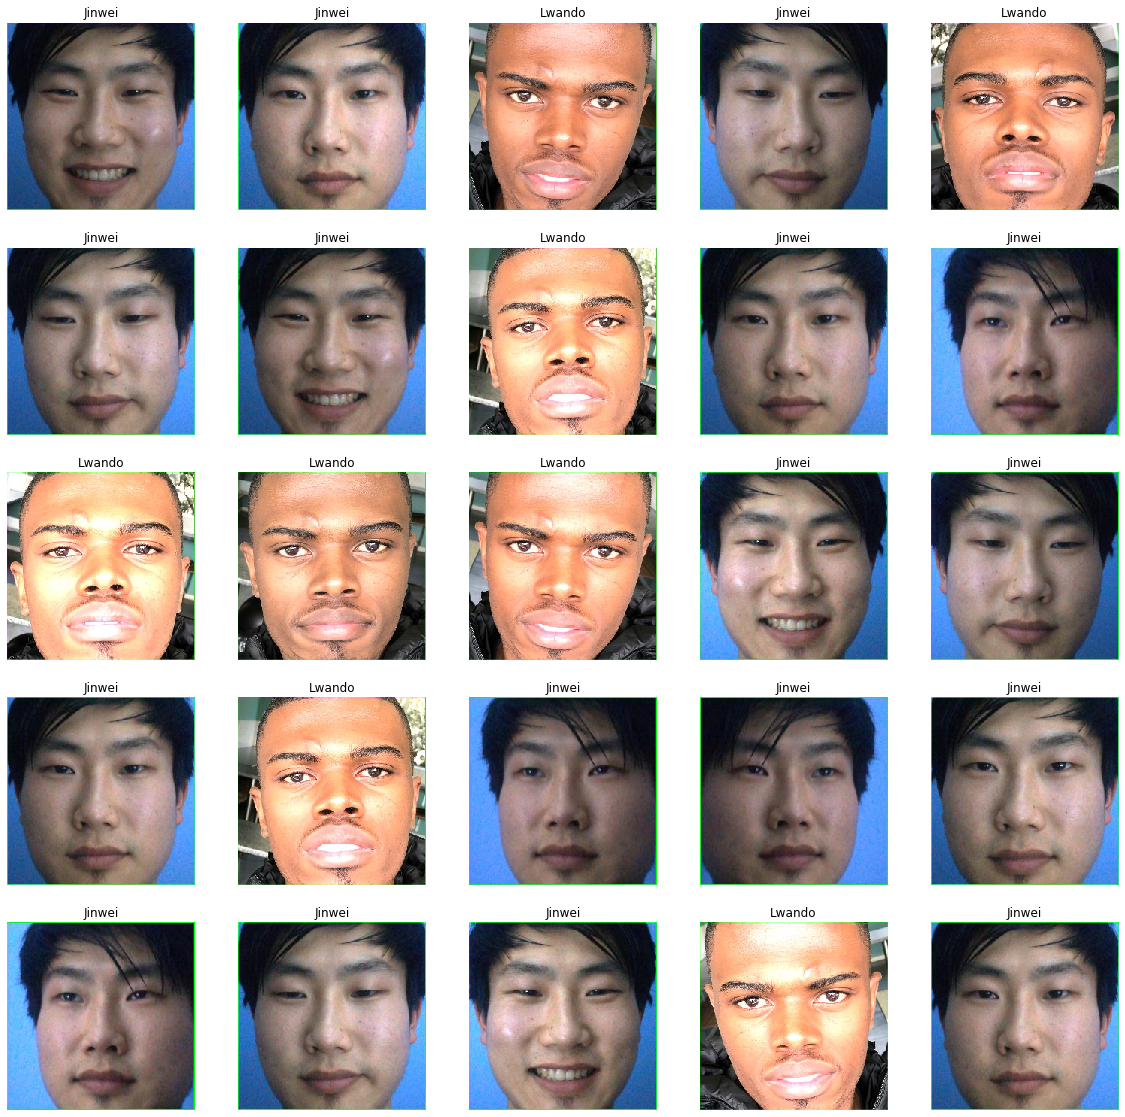

In [13]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

## Developing CNN Model

In [27]:
model = Sequential([  
    Dense(16,activation='relu', input_shape=(250,250,3)),
    Convolution2D(32, kernel_size=(3,3), padding='same', 
                  kernel_regularizer=regularizers.l2(0.01),
                  activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),

    Convolution2D(64, kernel_size=(3,3), padding='same', 
                  kernel_regularizer=keras.regularizers.l2(0.01),
                  activation='relu'),
    MaxPooling2D(),
    
    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 250, 250, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 246016)           

### Display model architecture

## Training CNN model

In [28]:
history = model.fit(train_data_gen, epochs=55, 
                    validation_data = val_data_gen, verbose = 1)

Epoch 1/55
4/4 [==============================] - 16s 4s/step - loss: 8.8002 - accuracy: 0.7143 - val_loss: 4.0256 - val_accuracy: 0.8750
Epoch 2/55
4/4 [==============================] - 15s 4s/step - loss: 4.4350 - accuracy: 0.8750 - val_loss: 4.0708 - val_accuracy: 1.0000
Epoch 3/55
4/4 [==============================] - 16s 4s/step - loss: 4.0572 - accuracy: 0.9821 - val_loss: 4.0745 - val_accuracy: 1.0000
Epoch 4/55
4/4 [==============================] - 16s 4s/step - loss: 3.9260 - accuracy: 1.0000 - val_loss: 3.8403 - val_accuracy: 1.0000
Epoch 5/55
4/4 [==============================] - 16s 4s/step - loss: 3.6511 - accuracy: 1.0000 - val_loss: 3.5034 - val_accuracy: 1.0000
Epoch 6/55
4/4 [==============================] - 16s 4s/step - loss: 3.3318 - accuracy: 1.0000 - val_loss: 3.1418 - val_accuracy: 1.0000
Epoch 7/55
4/4 [==============================] - 16s 4s/step - loss: 2.9968 - accuracy: 1.0000 - val_loss: 2.7988 - val_accuracy: 1.0000
Epoch 8/55
4/4 [==================

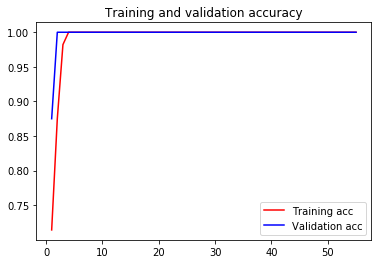

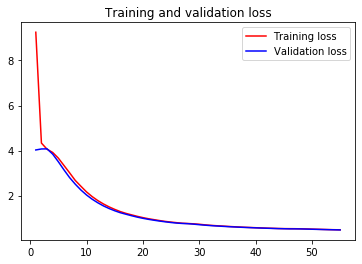

In [37]:

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.ylim(0.0, 1.01)

plt.figure(facecolor="white")

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Saving model on current directory

In [38]:
model.save("FaceDetect.h5")

Retreiving training data

In [40]:
training_dir = "C:/Users/lwand/OneDrive/Desktop/iot/Face Dection/Test/"

In [41]:
test_gen = ImageDataGenerator(rescale =1./255)


test_data = test_gen.flow_from_directory(
    training_dir, target_size=(250,250),
    classes = classes, shuffle=False,
)

Found 40 images belonging to 2 classes.


Function for plotting confusion matrix

In [48]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix for face detection model',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Making predictions on test data

In [49]:
filenames = test_data.filenames
nb_samples = len(filenames)

predictions = model.predict_generator(test_data)


In [50]:
y_true = test_data.classes
y_pred = np.argmax(predictions,axis=1)

In [51]:
cm = confusion_matrix(y_true,y_pred)

Plotting confusion matrix

Confusion matrix, without normalization
[[20  0]
 [ 0 20]]


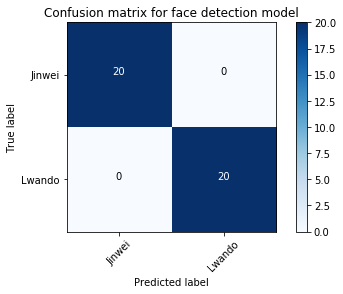

In [52]:
plot_confusion_matrix(cm,classes=classes)

In [47]:
score = model.evaluate(test_data, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.47544559836387634 / Test accuracy: 1.0
